In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('IPL.csv')
df.head()


,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [13]:
print(f"your rows are {df.shape[0]} and your columns are {df.shape[1]}")


your rows are 74 and your columns are 20


In [14]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

In [22]:
# most won matcges by team
match_win = df['match_winner'].value_counts()
match_win


match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

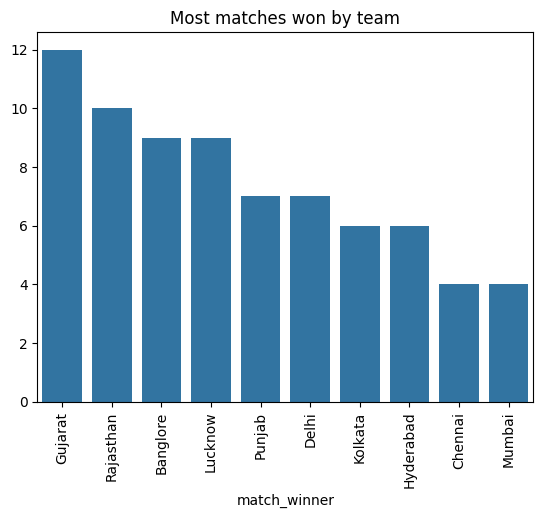

In [23]:
sns.barplot(x= match_win.index , y = match_win.values)
plt.xticks(rotation= 90)
plt.title('Most matches won by team')
plt.show()

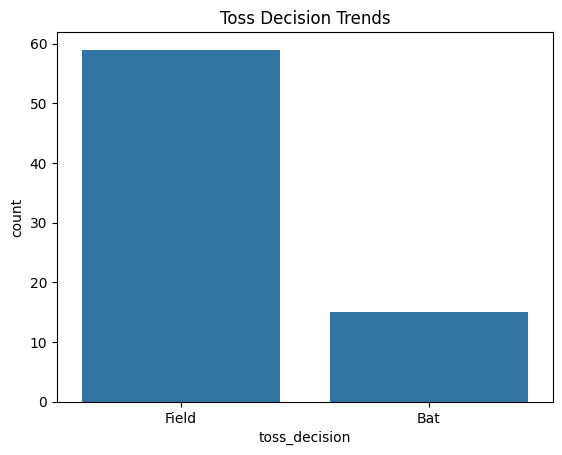

In [27]:
# toss decision trends 
sns.countplot(x= 'toss_decision' , data = df)
plt.title('Toss Decision Trends')   
plt.show()

In [33]:
# Toss winner vs match winner
winners = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percent_wins = (winners / df.shape[0]) * 100
percent_wins

np.float64(48.64864864864865)

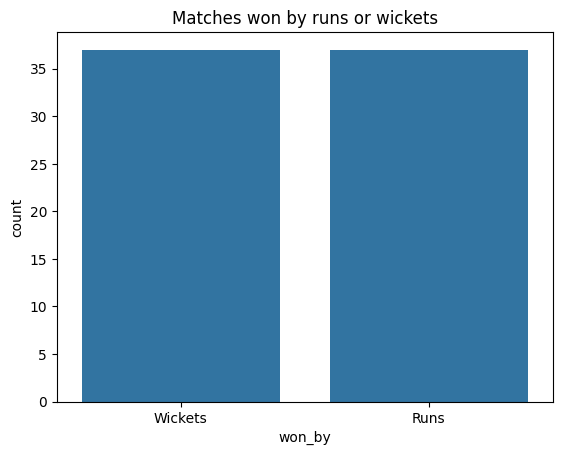

In [38]:
sns.countplot(x= df['won_by'])
plt.title('Matches won by runs or wickets')
plt.show()

In [ ]:
# most player of the match awards
player_of_match = df['player_of_the_match'].value_counts().head(10)


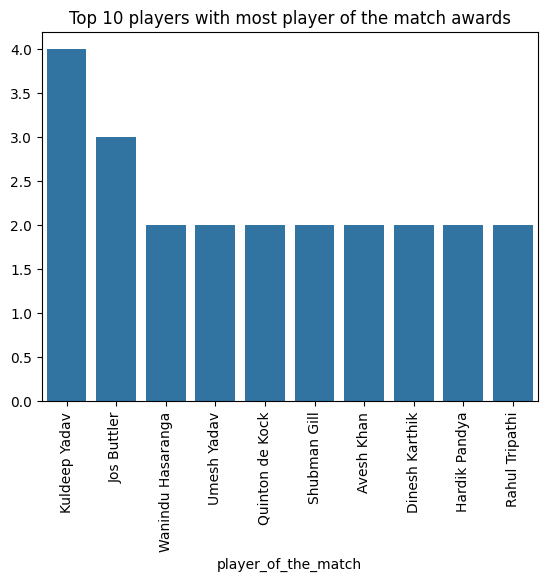

In [48]:
sns.barplot(x= player_of_match.index , y = player_of_match.values)
plt.xticks(rotation= 90)    
plt.title('Top 10 players with most player of the match awards')
plt.show()

In [59]:
# top two scorers in IPL 2022
highest_scorers = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending= False).head(2)
highest_scorers


top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

Text(0.5, 1.0, 'Top 2 highest scorers in IPL 2022')

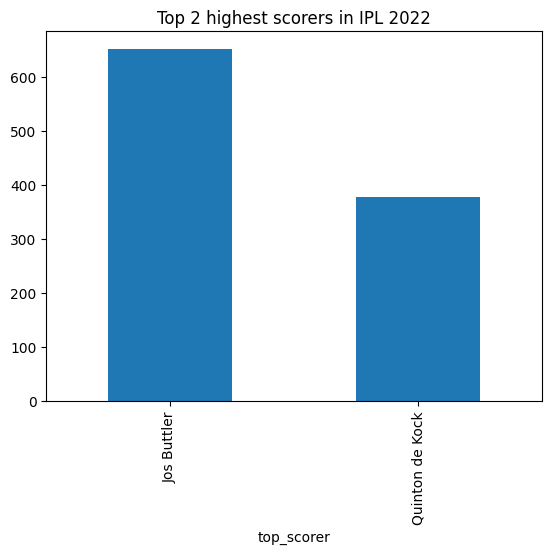

In [60]:
highest_scorers.plot(kind= 'bar')
plt.title('Top 2 highest scorers in IPL 2022')

In [70]:
# bowling figures
best_bowlers = df.groupby('best_bowling')['best_bowling_figure'].sum().sort_values(ascending= False)
best_bowlers.head(2)



best_bowling
Andre Russell       4--53--22
Mukesh Choudhary        4--46
Name: best_bowling_figure, dtype: object

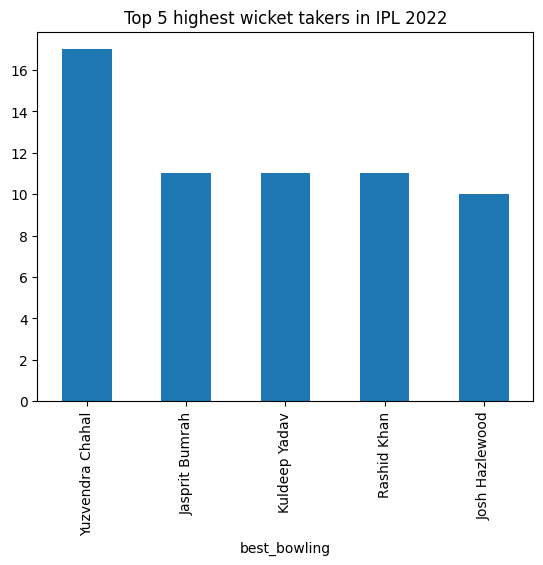

In [81]:
# highest wicket taker
df['highest_wicket'] = df['best_bowling_figure'].str.split('-').str[0].astype(int)
highest_wicket_taker = df.groupby('best_bowling')['highest_wicket'].sum().sort_values(ascending= False).head(5)
highest_wicket_taker.plot(kind= 'bar')
plt.title('Top 5 highest wicket takers in IPL 2022')    
plt.show()

In [ ]:
# most matches played by venue
venue_counts = df['venue'].value_counts()
venue_counts


venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

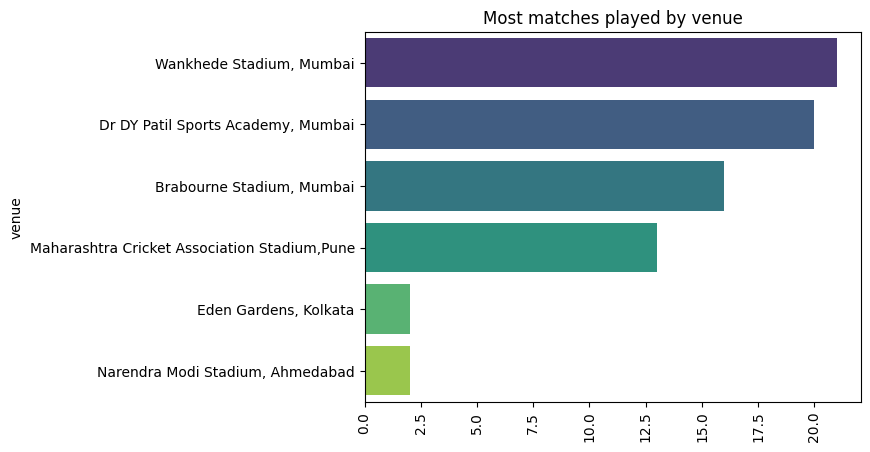

In [89]:
sns.barplot(y= venue_counts.index , x = venue_counts.values , palette= 'viridis')
plt.xticks(rotation= 90)
plt.title('Most matches played by venue')
plt.show()

In [92]:
# most runs by margin
df[df['won_by']=='Runs'].sort_values(by= 'margin', ascending= False).head(1)[['match_winner', 'margin']]



,match_winner,margin
54,Chennai,91


In [ ]:
# highest individual score
df[df['highscore']== df['highscore'].max()][['top_scorer', 'highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


In [98]:
# highest bowling figure
df[df['highest_wicket']== df['highest_wicket'].max()][['best_bowling', 'best_bowling_figure']]    

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
